## MEJORES HIPERPARÁMETROS PARA DOS ALGORITMOS PREDICTIVOS

In [2]:
# Se instalan las librerías necesarias
!pip install scikit-learn

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Cargar el dataset
file_path = 'Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(file_path)

# Seleccionar las características y el target
X = df[['Critic_Score', 'User_Score', 'Genre', 'Platform']]
y = df['Global_Sales']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['Genre', 'Platform'], drop_first=True)

# Manejar valores faltantes con SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Buscar los mejores hiperparámetros para cada modelo usando RandomizedSearchCV
for model_name, model_details in models.items():
    print(f"Running RandomizedSearchCV for {model_name}...")
    random_search = RandomizedSearchCV(estimator=model_details['model'], param_distributions=model_details['params'],
                                       n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best score for {model_name}: {random_search.best_score_}")

    # Evaluar el mejor modelo en el conjunto de prueba
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error for {model_name}: {mse}")
    print(f"R^2 Score for {model_name}: {r2}")
    print("\n")


Running RandomizedSearchCV for LinearRegression...


C:\Users\conso\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for LinearRegression: {'fit_intercept': True}
Best score for LinearRegression: -1.7637390225851894
Mean Squared Error for LinearRegression: 3.9535332120001723
R^2 Score for LinearRegression: 0.042253819177469065


Running RandomizedSearchCV for DecisionTreeRegressor...
Best parameters for DecisionTreeRegressor: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'poisson'}
Best score for DecisionTreeRegressor: -1.6475812484369914
Mean Squared Error for DecisionTreeRegressor: 3.849309292468742
R^2 Score for DecisionTreeRegressor: 0.06750213644937109




## CURVAS DE APRENDIZAJE

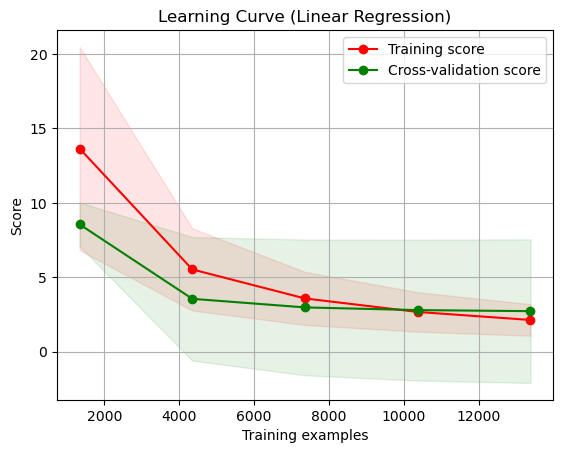

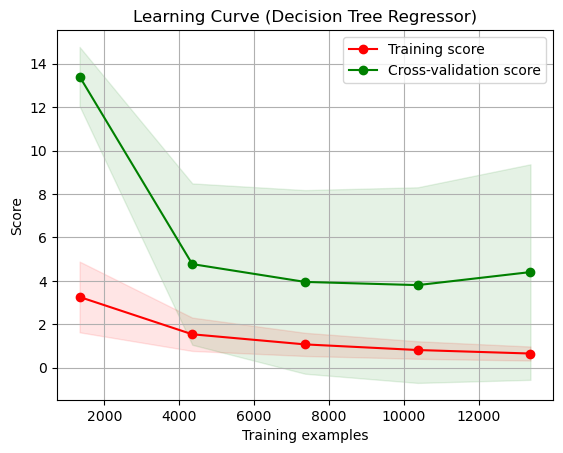

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Generar curvas de aprendizaje para LinearRegression
plot_learning_curve(LinearRegression(), "Learning Curve (Linear Regression)", X, y, cv=5, n_jobs=-1)
plt.show()

# Generar curvas de aprendizaje para DecisionTreeRegressor
plot_learning_curve(DecisionTreeRegressor(), "Learning Curve (Decision Tree Regressor)", X, y, cv=5, n_jobs=-1)
plt.show()
